<a href="https://colab.research.google.com/github/daisy-rivera/Project-2/blob/main/Project2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Average Cost of Undergraduate Student by State (USA)

##Data Description

- This data is posted on Kaggle and was gathered from the National Center for Education Statistics Annual Digest who publishes an annual Digest of Education Statistics report which includes data regarding education in the U.S. 
- It includes information on the average cost of college in the United States, by state and type of institution from 2013 thru 2021.

###Link to datasource [Here](https://www.kaggle.com/datasets/bhargavchirumamilla/average-cost-of-undergraduate-student-by-state-usa)


##Task

- This database will help students predict the average cost for Undergraduate school by state and help them make what is probably one of the biggest investments of their life.

##Import Libraries

In [1]:
# Pandas
import pandas as pd
# Numpy
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

## Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

## Regression Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

##Import Data

In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filename = '/content/drive/MyDrive/Coding Dojo/Stack 2 - Machine Learning/08 Wk 8 Boosting/Data Files/average  cost of undergradschool.xlsx'
df = pd.read_excel(filename)


#displaying first 5 rows
df.head()

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


##Inspecting Data

In [5]:
#checking how many rows, datatypes and if there is any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB


In [6]:
#show # of rows & columns
df.shape

print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')

#explain what your row and columns represent
print(f'The rows represent {df.shape[0]} students, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 3548 rows, and 6 columns.
The rows represent 3548 students, and the columns represent 5 features and 1 target variable.


In [7]:
#verifying the missing values
df.isna().sum().sum()

0

In [8]:
#creating a list of object columns
object_list = list(df.select_dtypes(include='object'))
object_list

['State', 'Type', 'Length', 'Expense']

In [9]:
#looping thru object columns to verify inconsistencies and how many categories in each
for each in object_list:
  print(f'{each} column')
  print(df[each].value_counts())
  print('\n')


State column
Alabama                 71
Montana                 71
New Hampshire           71
New Jersey              71
New Mexico              71
New York                71
North Carolina          71
North Dakota            71
Ohio                    71
Oklahoma                71
Oregon                  71
Pennsylvania            71
Rhode Island            71
South Carolina          71
South Dakota            71
Tennessee               71
Texas                   71
Utah                    71
Vermont                 71
Virginia                71
Washington              71
West Virginia           71
Wisconsin               71
Nebraska                71
Missouri                71
Illinois                71
California              71
Connecticut             71
Arkansas                71
Arizona                 71
Florida                 71
Georgia                 71
Hawaii                  71
Idaho                   71
Mississippi             71
Indiana                 71
Iowa           

In [10]:
#checking for outliers and impossible values
df.describe()

,Year,Value
count,3548.000000,3548.000000
mean,2016.923337,13027.720124
std,2.553910,8734.568645
min,2013.000000,1225.000000
25%,2015.000000,7756.750000
50%,2017.000000,10203.500000
75%,2019.000000,14830.750000
max,2021.000000,49152.000000


##Data Cleaning

- There are no missing rows and no duplicates.
- All datatypes look correct.
- There are no unusual or outlier values.
- Will treat 'year' column as a categorical value and OneHotEncode it.
- Will OneHotCode all Categorical columns

##Copy of df

In [11]:
#make copy of df for machine learning
mldf = df.copy()

##Exploratory Data Analysis

It is clear that 


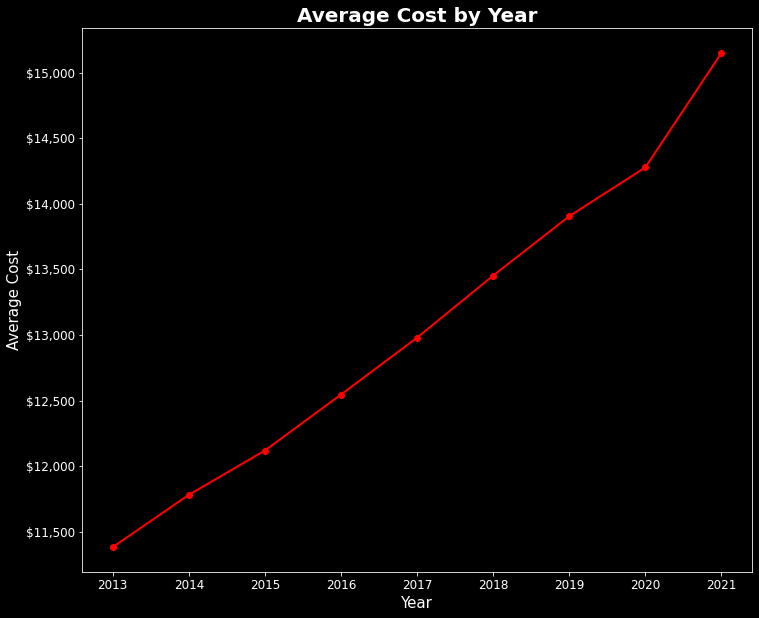

In [20]:
plt.style.use('dark_background')

#filter for average cost per year
year_average = df.groupby('Year')['Value'].mean().round(2)

#plotting line graph
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(year_average.index, year_average.values, marker='.',linewidth=2, markersize=12, color='red')
plt.title('Average Cost by Year', fontsize=20, fontweight='bold')
plt.ylabel('Average Cost',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(size=12)
plt.yticks(size=12)
ax.yaxis.set_major_formatter('${x:,.0f}');

> The data clearly shows that the average cost of tuition is increasing year by year. We can confidently conclude that the cost of tuition will continue to rise in the upcoming years.

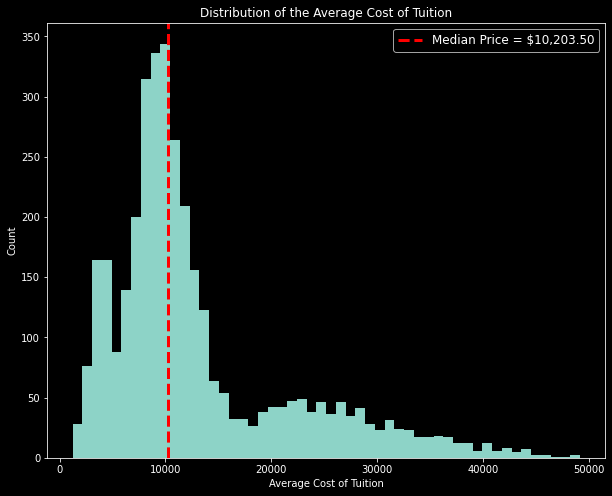

In [33]:
#setting the figure size
fig, ax = plt.subplots(figsize = (10,8))

#creating the histogram
ax.hist(df['Value'], bins = 'auto'); 

#customizing the graph
plt.xlabel('Average Cost of Tuition')
plt.ylabel('Count')
plt.title('Distribution of the Average Cost of Tuition')

#code to add line and customize it on the graph
plt.axvline(median, color = 'red', ls = '--', label = f'Median Price = ${median:,.2f}',lw=3)
plt.legend(fontsize=12,loc='upper right');


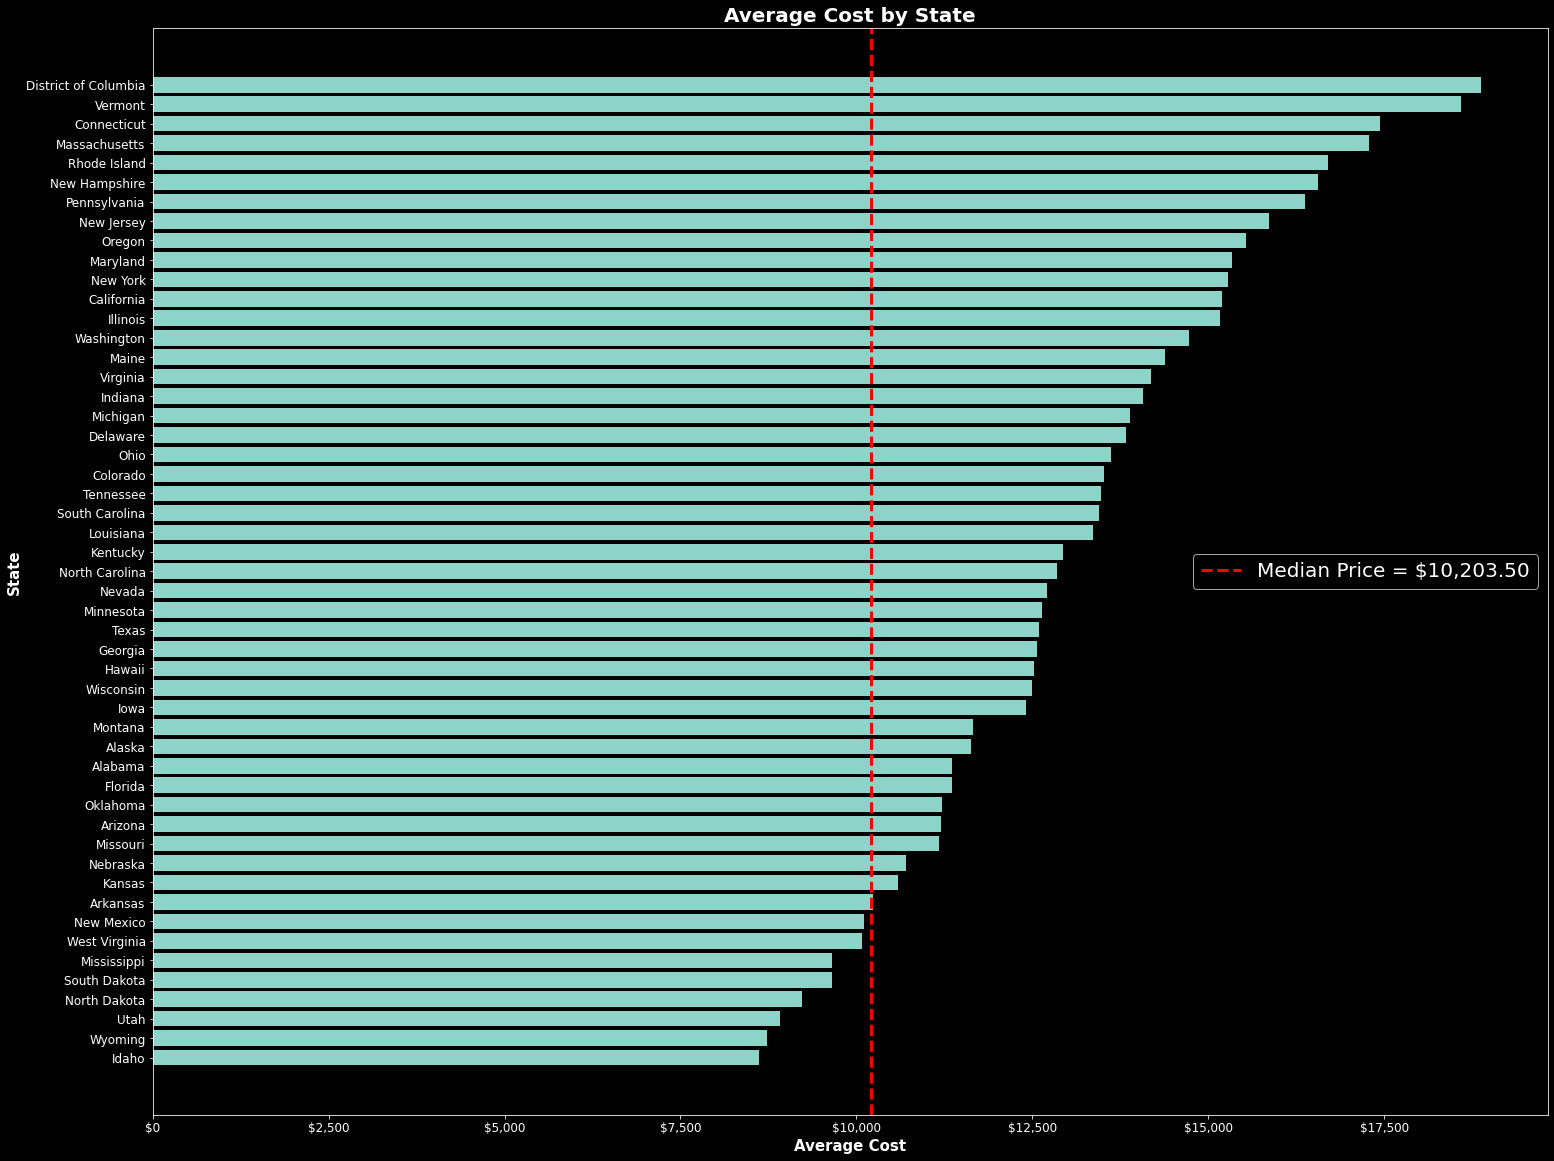

In [15]:
#filtering and sorting average cost by state
state_value = df.groupby('State')['Value'].mean().sort_values()

#plotting bar graph
fig, ax = plt.subplots(figsize=(25,20))
plt.barh(state_value.index, state_value.values)
plt.title('Average Cost by State', fontsize=20, fontweight='bold')
plt.ylabel('State',fontsize=15,fontweight='bold')
plt.xlabel('Average Cost',fontsize=15,fontweight='bold')
plt.xticks(size=12)
plt.yticks(size=12)
ax.xaxis.set_major_formatter('${x:,.0f}');


#creating a median line on the graph
median = df['Value'].median().round(2) # getting the median line

#code to add line and customize it on the graph
plt.axvline(median, color = 'red', ls = '--', label = f'Median Price = ${median:,.2f}',lw=3)

plt.legend(fontsize=20,loc='center right');


> The distribution of the average cost of tuition shows us that the majority of the students are paying between  $\\$$8,000-$\\$$12,000 in Tuition. 

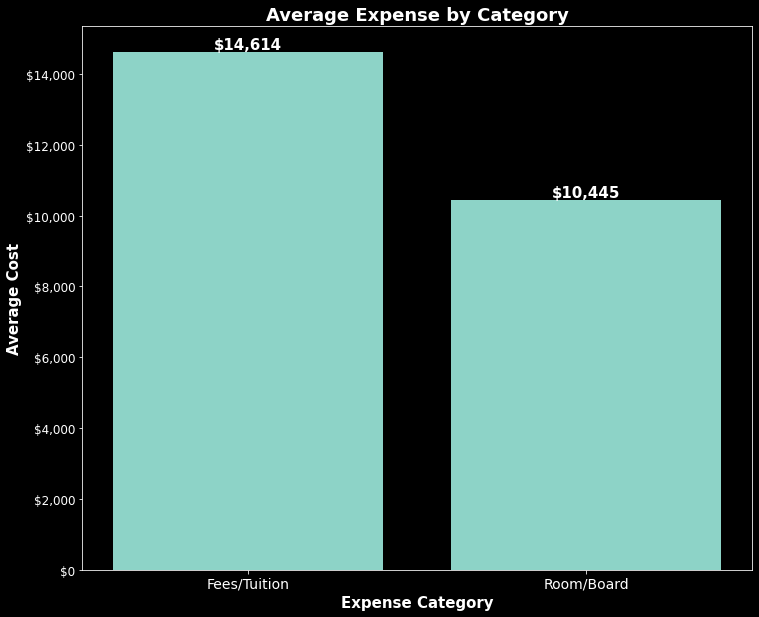

In [14]:
#filter for average cost by expense category
exp_type = df.groupby('Expense')['Value'].mean()

#plotting bar graph
fig, ax = plt.subplots(figsize=(12,10))
exp_container = ax.bar(exp_type.index, exp_type.values)
ax.bar_label(exp_container, fmt='${:,.0f}',size=15, color='white', fontweight='bold')
plt.title('Average Expense by Category', fontsize=18, fontweight='bold')
plt.ylabel('Average Cost',fontsize=15,fontweight='bold')
plt.xlabel('Expense Category',fontsize=15,fontweight='bold')
plt.xticks(size=14)
plt.yticks(size=12)
ax.yaxis.set_major_formatter('${x:,.0f}');

> The average expense by category shows that Room/Board is only slightly lower than the Fees/Tuition meaning that the total cost of tuition is largely split between the two expenses.